# Gradient Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import rasterio

import pylandstats as pls

Landscape metrics are very sensitive to scale, that is, to the pixel resolution and spatial extent of the considered map. Rather than restricting our analyses to a specific map extent, we are often interested in assessing how landacape patterns respond to a variety of definitions of the spatial extent.

A remarkable example is the evaluation of landscape changes across the urban-rural gradient. Consider the following landscape of the Canton of Vaud, Switzerland:

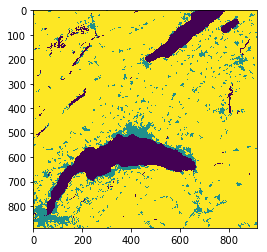

In [2]:
URBAN_CLASS_VAL = 1
input_filepath = 'data/clc/00.tif'

with rasterio.open(input_filepath) as src:
    plt.imshow(src.read(1))

Blue and yellow pixels represent urban and natural land uses respectively (purple pixels denote points with no data - outside the scope of the analysis). At the center of our Landscape stands a large urban patch, which corresponds to the agglomeration of Lausanne.

## Buffer Analysis

In order to evaluate how the landscape patterns change across the urban-rural gradient, we can define a series of spatial extents for our landscape based on buffers of increasing distances around our feature of interest - in this example, the agglomeration of Lausanne.

### From Point

We might define a given coordinate as the center of our region of interest (in this example, the center of Lausanne) and a series of buffer distances around that point:

In [3]:
from shapely.geometry import Point

# latitude and longitude of the center of Lausanne according to OpenStreetMap
base_mask = Point(6.6327025, 46.5218269)

# buffer distances (in meters)
buffer_dists = [10000, 15000, 20000]

then, we can use the `BufferAnalysis` class of Pylandstats in order to (note that we need to provide the CRS of the geometry - in this example, the coordinate point)

In [4]:
ba = pls.BufferAnalysis(input_filepath, base_mask, buffer_dists, base_mask_crs={'init':'epsg:4326'})

The `BufferAnalysis` instance will automatically generate the three landscapes of interest (one for each buffer distance) by masking the pixels of the input raster

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e7a14b00>,
       dtype=object))

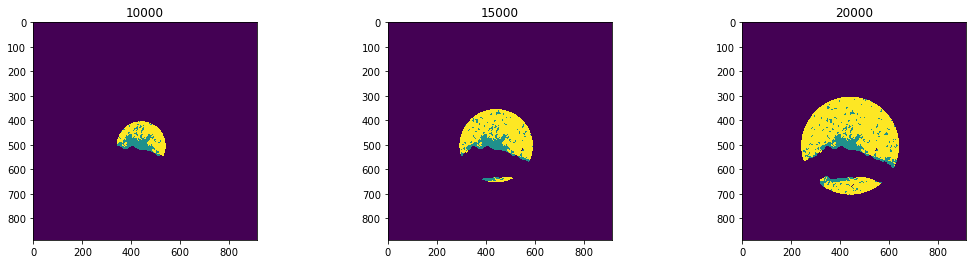

In [5]:
ba.plot_landscapes()

And we can now compute and plot the landscape metrics for each of the buffered landscapes

In [6]:
ba.class_metrics_df.head()

metric                 total_area proportion_of_landscape number_of_patches  \
class_val buffer_dists                                                        
1.0       10000           7245.51                 37.3313                19   
          15000           10466.3                 23.2059                49   
          20000             15282                  16.892               100   
2.0       10000           12163.2                 62.6687                 5   
          15000           34635.7                 76.7941                 4   

metric                 patch_density largest_patch_index total_edge  \
class_val buffer_dists                                                
1.0       10000            0.0978943             32.2823     196090   
          15000             0.108643             14.7345     376284   
          20000             0.110535             7.34568     681376   
2.0       10000            0.0257617             61.6486     196090   
          15000            0.0088688             74.0162     376284   

metric                 edge_density landscape_shape_index  area_mn  area_am  \
class_val buffer_dists                                                        
1.0       10000             10.1032               6.72553  381.343  5430.12   
          15000             8.34297               10.6249  213.598     4306   
          20000             7.53161               15.5109   152.82  3317.59   
2.0       10000             10.1032               5.36301  2432.64  11772.3   
          15000             8.34297               6.32679  8658.91  32208.2   

metric                  ... fractal_dimension_md fractal_dimension_ra  \
class_val buffer_dists  ...                                             
1.0       10000         ...              1.08468             0.163022   
          15000         ...              1.08166             0.141294   
          20000         ...              1.08728              0.18898   
2.0       10000         ...              1.03676             0.174917   
          15000         ...              1.11644              0.14085   

metric                 fractal_dimension_sd fractal_dimension_cv  \
class_val buffer_dists                                             
1.0       10000                   0.0413217              3.81401   
          15000                   0.0326372               3.0097   
          20000                   0.0363568              3.35139   
2.0       10000                   0.0663103              6.25102   
          15000                   0.0528502              4.75352   

metric                 euclidean_nearest_neighbor_mn  \
class_val buffer_dists                                 
1.0       10000                               692.65   
          15000                              804.029   
          20000                               830.23   
2.0       10000                              209.436   
          15000                              2514.05   

metric                 euclidean_nearest_neighbor_am  \
class_val buffer_dists                                 
1.0       10000                              278.827   
          15000                              347.445   
          20000                              417.883   
2.0       10000                              200.368   
          15000                              761.899   

metric                 euclidean_nearest_neighbor_md  \
class_val buffer_dists                                 
1.0       10000                              499.983   
          15000                              670.798   
          20000                              721.086   
2.0       10000                              199.993   
          15000                              361.791   

metric                 euclidean_nearest_neighbor_ra  \
class_val buffer_dists                                 
1.0       10000                              1699.87   
          15000                              3193.89   
  

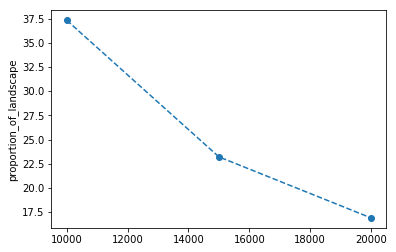

In [7]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

To examine more closely how landscape patterns change as we move along the urban-rural gradient, we might actually want to compute the metrics for each of the buffer rings that lie within each pair of increasing buffer distances. For instance, for the buffer distances considered in this example (i.e., 10000, 15000 and 20000), we would like to compute the metrics for the buffer rings that go from 0 to 10000m, 10000-15000m and 15000-20000m around the center of Lausanne).

To that end, we might pass the argument `buffer_rings=True` when instantiating `BufferAnalysis` as in:

In [8]:
ba = pls.BufferAnalysis(
    input_filepath, base_mask, buffer_dists, buffer_rings=True, base_mask_crs={'init':'epsg:4326'})

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e77f0080>,
       dtype=object))

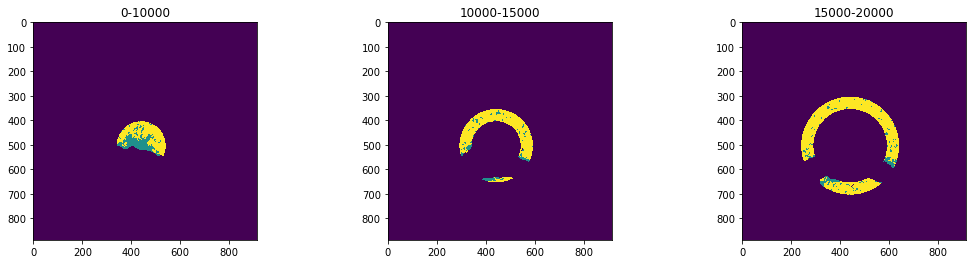

In [9]:
ba.plot_landscapes()

In [10]:
ba.class_metrics_df.head()

metric                 total_area proportion_of_landscape number_of_patches  \
class_val buffer_dists                                                        
1.0       0-10000         7245.51                 37.3313                19   
          10000-15000     3220.78                 12.5355                40   
          15000-20000     4815.67                 10.6149                59   
2.0       0-10000         12163.2                 62.6687                 5   
          10000-15000     22472.5                 87.4645                 2   

metric                 patch_density largest_patch_index total_edge  \
class_val buffer_dists                                                
1.0       0-10000          0.0978943             32.2823     196090   
          10000-15000       0.155683             2.49854     177594   
          15000-20000       0.130051             2.78598     303192   
2.0       0-10000          0.0257617             61.6486     196090   
          10000-15000     0.00778414             83.3392     177594   

metric                 edge_density landscape_shape_index  area_mn  area_am  \
class_val buffer_dists                                                        
1.0       0-10000           10.1032               6.72553  381.343  5430.12   
          10000-15000        6.9121               9.45327  80.5195   295.95   
          15000-20000        6.6831               12.4934  81.6216  602.627   
2.0       0-10000           10.1032               5.36301  2432.64  11772.3   
          10000-15000        6.9121               5.20302  11236.2  20452.6   

metric                  ... fractal_dimension_md fractal_dimension_ra  \
class_val buffer_dists  ...                                             
1.0       0-10000       ...              1.08468             0.163022   
          10000-15000   ...              1.06782             0.131799   
          15000-20000   ...              1.08722              0.18898   
2.0       0-10000       ...              1.03676             0.174917   
          10000-15000   ...              1.15027            0.0193329   

metric                 fractal_dimension_sd fractal_dimension_cv  \
class_val buffer_dists                                             
1.0       0-10000                 0.0413217              3.81401   
          10000-15000             0.0318367               2.9685   
          15000-20000             0.0382066              3.53097   
2.0       0-10000                 0.0663103              6.25102   
          10000-15000            0.00966644             0.840362   

metric                 euclidean_nearest_neighbor_mn  \
class_val buffer_dists                                 
1.0       0-10000                             692.65   
          10000-15000                        1039.84   
          15000-20000                        955.783   
2.0       0-10000                            209.436   
          10000-15000                        9117.81   

metric                 euclidean_nearest_neighbor_am  \
class_val buffer_dists                                 
1.0       0-10000                            278.827   
          10000-15000                        572.262   
          15000-20000                        789.034   
2.0       0-10000                            200.368   
          10000-15000                        9117.81   

metric                 euclidean_nearest_neighbor_md  \
class_val buffer_dists                                 
1.0       0-10000                            499.983   
          10000-15000                        992.451   
          15000-20000                        824.593   
2.0       0-10000                            199.993   
          10000-15000                        9117.81   

metric                 euclidean_nearest_neighbor_ra  \
class_val buffer_dists                                 
1.0       0-10000                            1699.87   
          10000-15000                        3134.65   
  

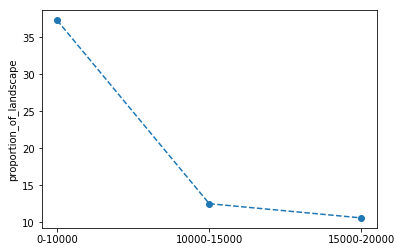

In [11]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

### From Polygon

We might as well build our buffer zones from polygon geometries such as administrative boundaries

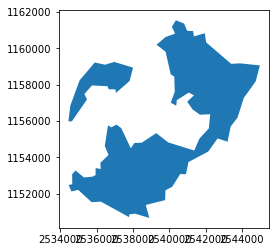

In [12]:
import geopandas as gpd

gdf = gpd.read_file('data/gmb/g1a18.shp')
base_mask = gdf[gdf['GMDNAME'] == 'Lausanne']['geometry']
base_mask.plot()

Note that in this case, since we are working with a GeoSeries that has a CRS defined, we do not need to set it explicitly with the `base_mask_crs` argument.

In [13]:
base_mask.crs

{'init': 'epsg:2056'}

Also note that since in this case our base mask from which we will define buffer zones, we might want to start from smaller buffer distances, even from zero, so that we start computing the metrics for the region defined by the polygon itself (in our example, the administrative boundaries)

In [14]:
buffer_dists = [0, 10000, 20000]

In [15]:
ba = pls.BufferAnalysis(input_filepath, base_mask, buffer_dists)

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3cb9748>,
       dtype=object))

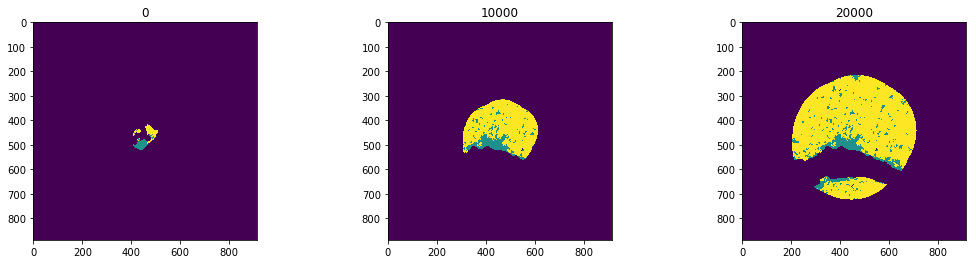

In [16]:
ba.plot_landscapes()

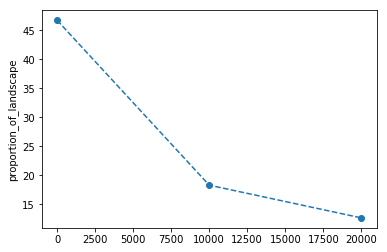

In [17]:
ba.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

## Gradient analysis a list of mask arrays

We might want to compute the metrics along a decomoposition of the landscape different than concentric buffers, for example, rectangular transects.

We might then use boolean arrays of the same shape of our landscape as masks to define our transects (or any other type of subregion really)

In [18]:
with rasterio.open(input_filepath) as src:
    base_mask_arr = np.full(src.shape,  False)

For instance, let us create three transects of 300x200 cells (30x20km) that horizontally traverse our landscape at the latitude of Lausanne

In [19]:
masks_arr = []
transect_len = 300
for transect_start in range(0, 900, transect_len):
    mask_arr = np.copy(base_mask_arr)
    mask_arr[400:600,transect_start:transect_start+transect_len] = True
    masks_arr.append(mask_arr)

This is how the mask of each transect looks:

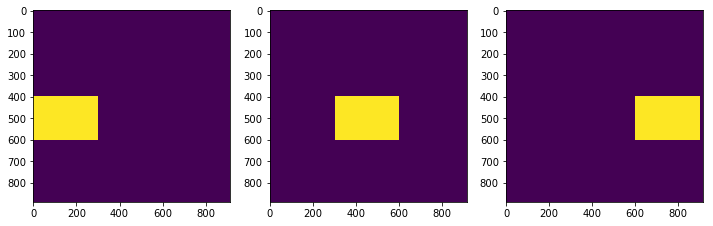

In [20]:
num_subplots = len(masks_arr)
fig = plt.figure(figsize=(num_subplots * 4, 4))

for i in range(num_subplots):
    ax = fig.add_subplot(1, num_subplots, i + 1)
    ax.imshow(masks_arr[i])

We will now use the `GradientAnalysis` class with the list of mask arrays (corresponding to the transects) that we have constructed above. We can use the argument `feature_values` to map an identifying value or label to each of our landscapes. 

Here we will use strings that denote that each landscape corresponds to the transect from kilometers 0 to 30, 30 to 60 and 60 to 90 respectively. But we could have used any other list-like argument as long as it is consistent with the number of mask arrays provided through the `masks_arr` argument.

In [21]:
ga = pls.GradientAnalysis(
    input_filepath, masks_arr=masks_arr, feature_values=['0-30', '30-60', '60-90'])

(<Figure size 1296x288 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35e3c5dcc0>,
       dtype=object))

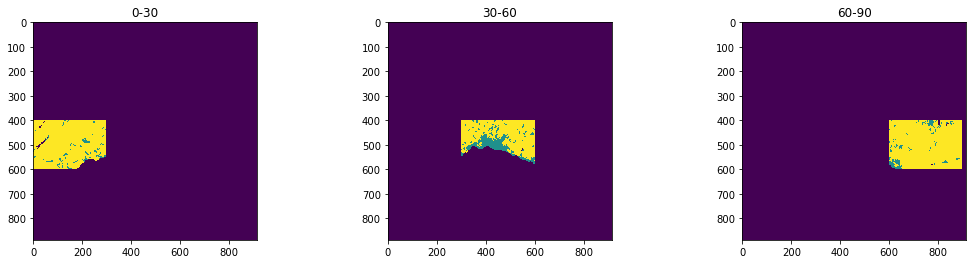

In [22]:
ga.plot_landscapes()

In [23]:
ga.class_metrics_df.head()

metric                   total_area proportion_of_landscape number_of_patches  \
class_val feature_values                                                        
1.0       0-30               2952.8                 5.34132                42   
          30-60             9645.35                 24.2003                43   
          60-90             3633.75                 6.10931                34   
2.0       0-30              52329.5                 94.6587                 2   
          30-60               30211                 75.7997                 5   

metric                   patch_density largest_patch_index total_edge  \
class_val feature_values                                                
1.0       0-30               0.0759737             0.66563     242498   
          30-60               0.107888             16.6738     332784   
          60-90              0.0571631             2.17877     221293   
2.0       0-30               0.0036178             94.6551     242498   
          30-60              0.0125451             75.2227     332784   

metric                   edge_density landscape_shape_index  area_mn  area_am  \
class_val feature_values                                                        
1.0       0-30                4.38653               12.0077  70.3048  149.821   
          30-60               8.34961               9.83057   224.31  4669.02   
          60-90               3.72053               9.69604  106.875  564.566   
2.0       0-30                4.38653               3.94962  26164.7  52325.5   
          30-60               8.34961               5.66388  6042.19  29753.5   

metric                    ... fractal_dimension_md fractal_dimension_ra  \
class_val feature_values  ...                                             
1.0       0-30            ...              1.09186             0.200585   
          30-60           ...              1.08201             0.167808   
          60-90           ...              1.08824             0.113153   
2.0       0-30            ...              1.07427             0.124815   
          30-60           ...              1.06341             0.173612   

metric                   fractal_dimension_sd fractal_dimension_cv  \
class_val feature_values                                             
1.0       0-30                      0.0441582              4.05773   
          30-60                     0.0363018              3.35642   
          60-90                     0.0329625              3.03691   
2.0       0-30                      0.0624077              5.80929   
          30-60                     0.0587007              5.46963   

metric                   euclidean_nearest_neighbor_mn  \
class_val feature_values                                 
1.0       0-30                                 740.554   
          30-60                                713.588   
          60-90                                1072.29   
2.0       0-30                                 223.599   
          30-60                                209.436   

metric                   euclidean_nearest_neighbor_am  \
class_val feature_values                                 
1.0       0-30                                 984.802   
          30-60                                348.646   
          60-90                                740.611   
2.0       0-30                                 223.599   
          30-60                                200.144   

metric                   euclidean_nearest_neighbor_md  \
class_val feature_values                                 
1.0       0-30                                 380.265   
          30-60                                 599.98   
          60-90                                 599.98   
2.0       0-30                                 223.599   
          30-60                                199.993   

metric                   euclidean_nearest_neighbor_ra  \
class_val feature_values                                

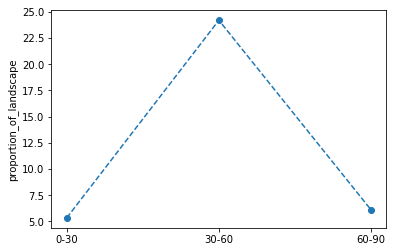

In [24]:
ga.plot_metric('proportion_of_landscape', class_val=URBAN_CLASS_VAL)

Note that the values that we pass to `feature_values` will be used within the metric dataframes and plot labels